# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [619]:
df=pd.read_csv('data/vehicles.csv')

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [621]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Based on the dataframe, we need to determine which features (columns) drive used car prices the most.  This is not an exercise to create a prediction of used car models, since most of the data here is categorical, rather than numerical. Instead, the exercise is to identify characteristics of the highest priced used car sales based on data that has been cleaned and transformed for use in models.


Some basic research reveals that used car sales are both cyclical, impacted by the overall US economy, and seasonal, with higher sales around tax season and lower sales in the winter months.  Additionally used car prices exhibit regional differences: "Kelley Blue Book analyzes car pricing across over 120 US geographic regions, recognizing that prices vary significantly. Similarly, iSeeCars.com has identified states with the highest and lowest average used car prices, highlighting regional variations"

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [622]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [623]:
#we want to go through the NaNs and clean them up
df.isna().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [624]:
#drop null rows for year since there are only a few
df.dropna(subset=['year'], inplace=True)

In [625]:
#we can use values in the type field to fill in NaN values of size so that we
#can then remove the type column entirely
#for NaN values of size, assign size = full if type= bus, offroad, mini-van, van, wagon, truck, SUV
df.loc[(df['size'].isna()) & (df['type'] == 'bus'), 'size'] = 'full-size'
#for NaN values of size, size = midsize for type=hatchback, sedan
df.loc[(df['size'].isna()) & (df['type'] == 'hatchback'), 'size'] = 'mid-size'
df.loc[(df['size'].isna()) & (df['type'] == 'sedan'), 'size'] = 'mid-size'
#for NaN values of size, size=compact for convertible, coupe
df.loc[(df['size'].isna()) & (df['type'] == 'convertible'), 'size'] = 'compact'
df.loc[(df['size'].isna()) & (df['type'] == 'coupe'), 'size'] = 'compact'
#remaining NaN rows are subcompact
df.loc[(df['size'].isna()), 'size'] = 'subcompact'
df.loc[df['size'] == 'sub-compact', 'size'] = 'subcompact'


<Axes: xlabel='condition'>

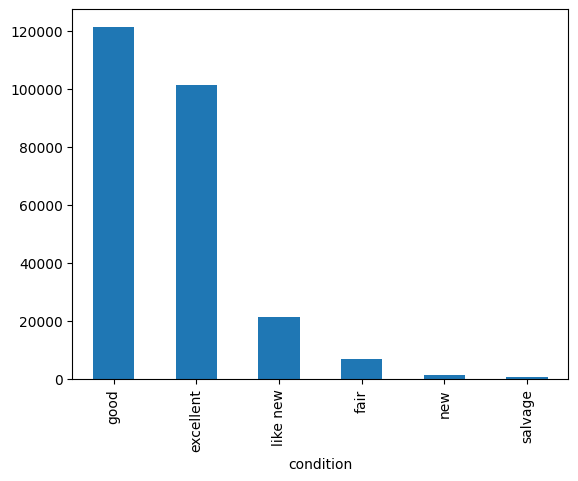

In [626]:
#bar plot condition
df['condition'].value_counts().plot(kind='bar')

In [627]:
#based on this graph, a conservative approach would assume the NaNs can be filled in with good
df['condition'] = df['condition'].fillna('good')

In [628]:
#change transmission Nan to "automatic" since it is the overwhelming majority
df['transmission'] = df['transmission'].fillna('automatic')

In [629]:
#since there are too many models, we can drop the column but first lets take
#information from the models column to populate what we can in manufacturer
#if model includes "scion", set manufacturer to "scion"
df.loc[df['model'].str.contains('scion', na=False), 'manufacturer'] = 'scion'
#if model includes 'genesis", set manufacturer to 'genesis'
df.loc[df['model'].str.contains('genesis', na=False), 'manufacturer'] = 'genesis'
#if model includes 'land', set manufacturer to 'land rover'
df.loc[df['model'].str.contains('land', na=False), 'manufacturer'] = 'land rover'
#if model includes 'hummer', set manufacturer to 'hummer'
df.loc[df['model'].str.contains('hummer', na=False), 'manufacturer'] = 'hummer'
#if model includes 'dodge', set manufacturer to 'dodge'
df.loc[df['model'].str.contains('dodge', na=False), 'manufacturer'] = 'dodge'
#if model includes 'rolls" set manufacturer to 'rolls royce'
df.loc[df['model'].str.contains('rolls', na=False), 'manufacturer'] = 'rolls royce'

In [630]:
#now that we filled in as much as we could from model, we need to reduce groupings for manufacturer
#drop null values of manufacturer
#future use we can focus on a specific brand or set of brands if the client requests further analysis
df.dropna(subset=['manufacturer'], inplace=True)
#select certain brands as luxury
luxury = ['cadillac', 'lincoln', 'jaguar', 'tesla','audi', 'mercedes-bens', 'bmw', 'porsche', 'mini','lexus', 'acura', 'infiniti','aston-martin', 'rolls royce', 'alfa romeo', 'land rover']
df['luxury'] = df['manufacturer'].apply(lambda x: 'luxury' if x in luxury else 'other')

In [631]:
# Filter the DataFrame for rows with NaN cylinders
nan_cylinders_df = df[df['cylinders'].isna()].copy()

# Apply np.where to this filtered DataFrame
# Use the .loc to assign values based on conditions within the SAME DataFrame (nan_cylinders_df)
nan_cylinders_df.loc[:, 'cylinders'] = np.where(nan_cylinders_df['size'] == 'full-size', 6, nan_cylinders_df['cylinders'])
nan_cylinders_df.loc[:, 'cylinders'] = np.where(nan_cylinders_df['size'] != 'full-size', 4, nan_cylinders_df['cylinders'])

# Update the original DataFrame using the modified 'cylinders' column from nan_cylinders_df
df.loc[nan_cylinders_df.index, 'cylinders'] = nan_cylinders_df['cylinders']


In [632]:
#clean up the rest of cylinders
#change 4 cylinders to 4
df.loc[df['cylinders'] == '4 cylinders', 'cylinders'] = 4
#change 5 cylinders to 5
df.loc[df['cylinders'] == '5 cylinders', 'cylinders'] = 5
#change 6 cylinders to 6
df.loc[df['cylinders'] == '6 cylinders', 'cylinders'] = 6
#change 8 cylinders to 8
df.loc[df['cylinders'] == '8 cylinders', 'cylinders'] = 8
#change 10 cylinders to 10
df.loc[df['cylinders'] == '10 cylinders', 'cylinders'] = 10
#change 12 cylinders to 12
df.loc[df['cylinders'] == '12 cylinders', 'cylinders'] = 12
#change 3 cylinders to 3
df.loc[df['cylinders'] == '3 cylinders', 'cylinders'] = 3
#change other to 1 cylinder
df.loc[df['cylinders'] == 'other', 'cylinders'] = 1

In [633]:
#make cylinders a text field instead of numeric
df['cylinders'] = df['cylinders'].astype(str)

In [634]:
#assign fuel NaN as gas since the vast majority of cars use gas fuel
df['fuel'] = df['fuel'].fillna('gas')


In [635]:
#odometer median value
median_odometer = df['odometer'].median()
print(median_odometer)


85953.0


In [636]:
#assign odometer median to odometer Nans
df['odometer'] = df['odometer'].fillna(median_odometer)

In [637]:
#divide odometer column into high, medium and low groupings

#odometer quantities
odometer_quantiles = df['odometer'].quantile([0.33, 0.66])
low_threshold = odometer_quantiles[0.33]
high_threshold = odometer_quantiles[0.66]

#odometer column
df['odometer_category'] = pd.cut(df['odometer'],
                                  bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                                  labels=['low', 'medium', 'high'])

In [638]:
#overwhelmingly clean so i'm going to change NaNs to clean
df['title_status'] = df['title_status'].fillna('clean')

In [639]:
#assign Nan values in paint_color to white or basic
df['paint_color'] = df['paint_color'].fillna('white')

In [640]:
#group colors for easier modeling
#basic colors are white, black, silver, blue, red, grey
basic=['white', 'black', 'silver', 'blue', 'red', 'grey']
custom=['custom']
rcolors=['green', 'yellow', 'orange', 'brown', 'purple']

#create a new column to map paint_color to color_type
df['color_type'] = df['paint_color'].apply(lambda x: 'basic' if x in basic else 'custom' if x in custom else 'rare' if x in rcolors else 'other')



In [641]:
drive=((df['drive'].isnull().sum()/df.shape[0])*100)
print('Percent of missing data is', drive)

Percent of missing data is 30.10186898096851


In [642]:
#with a large percent of missing data, drive gets added to the drop list at the end

In [643]:
#change the year column to age
df['age'] = 2025 - df['year']
#drop the year column
df.drop(columns=['year'], inplace=True)



<Axes: xlabel='age', ylabel='price'>

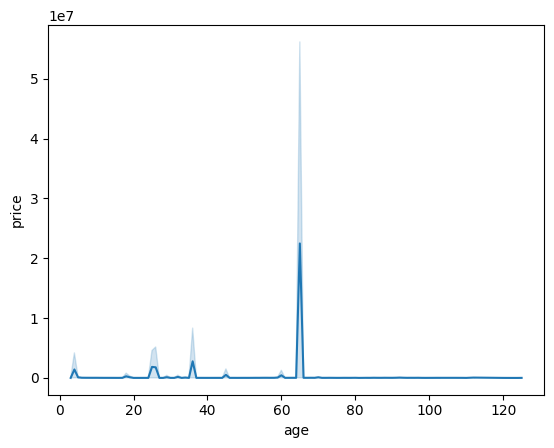

In [644]:
#create a line graph that shows age compared to price
sns.lineplot(data=df, x='age', y='price')

This graph shows a spike in price at the age of about 62 years, probably to represent antiques
  

In [645]:
#antique cars are greater than 60 but less than 70 years
df['luxury']=np.where((df['age'] > 60) & (df['age'] < 70), 'antique', df['luxury'])

In [646]:
#create fewer categories so we can drop state
#assign ca, co, ak to northwest
#assign az, ar to southwest
#assign fl, dc, al to southeast
#assign de, ct to northeast
northwest = ['ca', 'co', 'ak']
southwest = ['az', 'ar']
southeast = ['fl', 'dc', 'al']
northeast = ['de', 'ct']
#create column to map state to these groupings
df['gregion'] = df['state'].apply(lambda x: 'northwest' if x in northwest else 'southwest' if x in southwest else 'southeast' if x in southeast else 'northeast' if x in northeast else 'other')



In [647]:
#change age to an integer
df['age'] = df['age'].astype(int)

In [648]:
#final clean up to drop columns we don't need
df.drop(columns=['id', 'VIN','region', 'state', 'type', 'drive', 'model','manufacturer','odometer', 'title_status', 'paint_color'], inplace=True)

In [649]:
df.isna().sum()

,0
price,0
condition,0
cylinders,0
fuel,0
transmission,0
size,0
luxury,0
odometer_category,0
color_type,0
age,0


No more NaNs and the columns i no longer need have been dropped.

<Axes: xlabel='odometer_category', ylabel='price'>

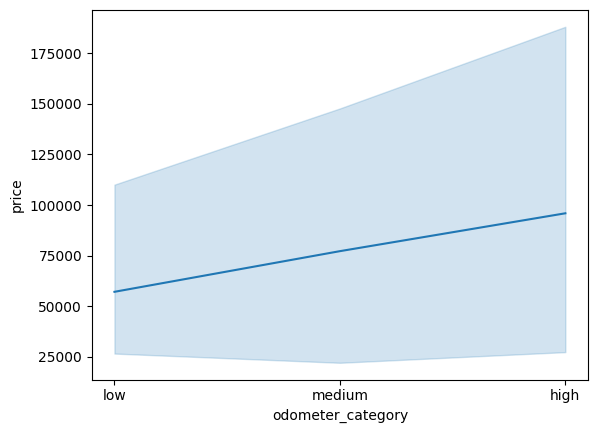

In [650]:
#sns lineplots of features with price
sns.lineplot(data=df, x='odometer_category', y='price')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [651]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [652]:
#define my features and target, reusing this repeatedly to drop additional features and find the most impt
X=df.drop(columns=['price'])
y=df['price']


In [653]:
#now i need to split my df into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train), type(y_train))

(286819, 10)
(122923, 10)
(286819,)
(122923,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [654]:
#before building a model, i will set a baseline to compare models later
baseline_train=np.full(y_train.shape, y_train.mean())
baseline_test=np.full(y_test.shape, y_train.mean())
mse_baseline_train=mean_squared_error(y_train, baseline_train)
mse_baseline_test=mean_squared_error(y_test, baseline_test)
print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(286819,) (122923,)
Baseline for training data: 18302458461484.996
Baseline for testing data: 472433235890734.56


In [655]:
#begin to define the model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [656]:
#make linreg for age
X1_train=X_train[['age']]
lr=LinearRegression().fit(X1_train, y_train)

In [657]:
#features are age and luxury
X2_train=X_train[['age','luxury']]
transformer_1=make_column_transformer((OrdinalEncoder(categories = [['luxury', 'antique', 'other']]), ['luxury']))
transformer_1.fit_transform(X2_train)



array([[2.],
       [2.],
       [0.],
       ...,
       [2.],
       [2.],
       [2.]])

In [658]:
#features are age and 2 categorical features luxury and condition
X3_train=X_train[['age', 'luxury', 'condition']]
transformer_2=make_column_transformer((OrdinalEncoder(categories = [['luxury', 'antique', 'other']]), ['luxury']),
                                                 (OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']))
transformer_2.fit_transform(X3_train)

array([[2., 3.],
       [2., 2.],
       [0., 3.],
       ...,
       [2., 4.],
       [2., 2.],
       [2., 3.]])

In [659]:
#this model is for 4 features
X4_train=X_train[['age', 'luxury', 'condition', 'size']]
transformer_3=make_column_transformer((OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
(OrdinalEncoder(categories = [['subcompact', 'compact', 'mid-size', 'full-size']]), ['size']),
(OrdinalEncoder(categories = [['luxury', 'antique', 'other']]), ['luxury']))

transformer_3.fit_transform(X_train[['age', 'condition', 'size', 'luxury']])[:5]


array([[3., 2., 2.],
       [2., 3., 2.],
       [3., 2., 0.],
       [2., 0., 2.],
       [2., 0., 2.]])

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409742 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   price              409742 non-null  int64   
 1   condition          409742 non-null  object  
 2   cylinders          409742 non-null  object  
 3   fuel               409742 non-null  object  
 4   transmission       409742 non-null  object  
 5   size               409742 non-null  object  
 6   luxury             409742 non-null  object  
 7   odometer_category  409742 non-null  category
 8   color_type         409742 non-null  object  
 9   age                409742 non-null  int64   
 10  gregion            409742 non-null  object  
dtypes: category(1), int64(2), object(8)
memory usage: 50.9+ MB


In [661]:
Xother_train=X_train[['age','cylinders', 'luxury', 'condition', 'size','fuel', 'transmission','odometer_category','color_type', 'gregion' ]]

transformer_4 = make_column_transformer(
    (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['odometer_category']),
    (OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
    (OrdinalEncoder(categories = [['subcompact', 'compact', 'mid-size', 'full-size']]), ['size']),
    (OrdinalEncoder(categories = [['luxury', 'antique', 'other']]), ['luxury']),
    (OrdinalEncoder(categories = [['1', '3', '4', '5', '6', '8','10', '12']]), ['cylinders']),
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['fuel']),
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['transmission']),
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['color_type']),
    (OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['gregion'])
)

transformer_4.fit_transform(Xother_train)

array([[1., 3., 2., ..., 0., 1., 0.],
       [2., 2., 3., ..., 1., 0., 0.],
       [1., 3., 2., ..., 1., 0., 0.],
       ...,
       [0., 4., 0., ..., 1., 0., 0.],
       [0., 2., 2., ..., 1., 0., 0.],
       [2., 3., 2., ..., 1., 0., 0.]])

In [662]:
#model created to evaluate the features of fuel, transmission and color_type
X5_train=X_train[['fuel', 'transmission','color_type']]

transformer_5 = make_column_transformer(
(OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['fuel']),
(OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['transmission']),
(OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['color_type']))

transformer_5.fit_transform(X5_train)

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [663]:
from os import pipe
#bring the three things together in a pipeline

pipe_1 = Pipeline([('transformer', transformer_1), ('linreg', LinearRegression())])
pipe_2 = Pipeline([('transformer', transformer_2), ('linreg', LinearRegression())])
pipe_3 = Pipeline([('transformer', transformer_3), ('linreg', LinearRegression())])
pipe_4=Pipeline([('transformer', transformer_4), ('linreg', LinearRegression())])
pipe_5=Pipeline([('transformer', transformer_5), ('linreg', LinearRegression())])
pipe_1.fit(X2_train, y_train)
pipe_2.fit(X3_train, y_train)
pipe_3.fit(X4_train, y_train)
pipe_4.fit(Xother_train, y_train)
pipe_5.fit(X5_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['transmission']),
                                                 ('onehotencoder-3',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['color_type'])])),
                ('linreg', LinearRegression())])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

I revisited certain groupings i created and made revisions based on some of the results that made no sense.  For example, i had a column called luxury broken down by country of origin.  I later decided on only 3 categories: luxury, antique and other
I also learned that age is not a great predictor because of the results from GridSearchCV.  
Finally, the number one characteristic was transmission type, with manual transmissions resulting in higher prices versus manual or other transmission types.  
Following transmission was fuel type with diesel engines resulting in higher prices than gas or hybrids cars.
Geographic region can impact a car price, so this is a good area to provide as follow on work for clients who want more focused analyses for their region.

In [664]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [665]:
#look at predictions of model 5
pred_train_5=pipe_5.predict(X_train[['fuel', 'transmission','color_type']])
pred_test_5=pipe_5.predict(X_test[['fuel', 'transmission','color_type']])
pred_train_mse_5=mean_squared_error(y_train, pred_train_5)
pred_test_mse_5=mean_squared_error(y_test, pred_test_5)
print(f'Train MSE: {pred_train_mse_5: .2f}')
print(f'Test MSE: {pred_test_mse_5: .2f}')

Train MSE:  18299869102297.44
Test MSE:  472437023368386.38


In [666]:
 #review the feature names for this model and check out the coefficients
 feature_names = pipe_5.named_steps['transformer'].get_feature_names_out()
 print(pipe_5.named_steps['linreg'].coef_)
 print(feature_names)

[ 62400.22683409 -13195.05039982 -13120.33952841 -23510.10927381
 -12574.72763205 -72025.64513305 136276.57875165 -64250.9336186
  17666.22080601  -2903.46372037 -14762.75708564]
['onehotencoder-1__fuel_diesel' 'onehotencoder-1__fuel_electric'
 'onehotencoder-1__fuel_gas' 'onehotencoder-1__fuel_hybrid'
 'onehotencoder-1__fuel_other' 'onehotencoder-2__transmission_automatic'
 'onehotencoder-2__transmission_manual'
 'onehotencoder-2__transmission_other' 'onehotencoder-3__color_type_basic'
 'onehotencoder-3__color_type_custom' 'onehotencoder-3__color_type_rare']


In [689]:
#coefficients for pipe5
# Get the expanded feature names after OneHotEncoding
feature_names = pipe_5.named_steps['transformer'].get_feature_names_out()

# Create the DataFrame with the correct feature names and coefficients
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': pipe_5.named_steps['linreg'].coef_})

# Sort by coefficient
coef_df = coef_df.sort_values(by='coefficient', ascending=False)
coef_df.head(10)

,feature,coefficient
6,onehotencoder-2__transmission_manual,136276.578752
0,onehotencoder-1__fuel_diesel,62400.226834
8,onehotencoder-3__color_type_basic,17666.220806
9,onehotencoder-3__color_type_custom,-2903.463720
4,onehotencoder-1__fuel_other,-12574.727632
2,onehotencoder-1__fuel_gas,-13120.339528
1,onehotencoder-1__fuel_electric,-13195.050400
10,onehotencoder-3__color_type_rare,-14762.757086
3,onehotencoder-1__fuel_hybrid,-23510.109274
7,onehotencoder-2__transmission_other,-64250.933619


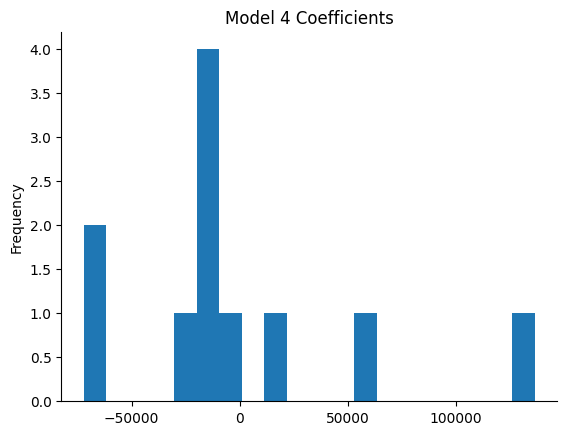

In [668]:
# @title coefficient

from matplotlib import pyplot as plt
coef_df['coefficient'].plot(kind='hist', bins=20, title='Model 4 Coefficients')
plt.gca().spines[['top', 'right',]].set_visible(False)

Model 4 is the winning model showing the lowest MSE of all of the other models by focusing on a smaller subset of promising features. Everything below this section is work I did to arrive at this answer.

In [669]:
#look at predictions and mses from the model 1
pred_train_1=pipe_1.predict(X_train[['age','luxury']])
pred_test_1=pipe_1.predict(X_test[['age','luxury']])
pred_train_mse_1=mean_squared_error(y_train, pred_train_1)
pred_test_mse_1=mean_squared_error(y_test, pred_test_1)
print(f'Train MSE: {pred_train_mse_1: .2f}')
print(f'Test MSE: {pred_test_mse_1: .2f}')

Train MSE:  18302450104963.16
Test MSE:  472433608765493.00


In [670]:
#look at predictions and mses of model 2
pred_train_2=pipe_2.predict(X_train[['age', 'luxury', 'condition']])
pred_test_2=pipe_2.predict(X_test[['age','luxury', 'condition']])
pred_train_mse_2=mean_squared_error(y_train, pred_train_2)
pred_test_mse_2=mean_squared_error(y_test, pred_test_2)
print(f'Train MSE: {pred_train_mse_2: .2f}')
print(f'Test MSE: {pred_test_mse_2: .2f}')

Train MSE:  18302403674006.05
Test MSE:  472432267949133.88


In [671]:
#predictions and mses of model 3
pred_train_3=pipe_3.predict(X_train[['age', 'luxury', 'condition', 'size']])
pred_test_3=pipe_3.predict(X_test[['age','luxury', 'condition', 'size']])
pred_train_mse_3=mean_squared_error(y_train, pred_train_3)
pred_test_mse_3=mean_squared_error(y_test, pred_test_3)
print(f'Train MSE: {pred_train_mse_3: .2f}')
print(f'Test MSE: {pred_test_mse_3: .2f}')

Train MSE:  18302256937653.83
Test MSE:  472433498751505.88


In [672]:
#predictions and mses of model 4
pred_train_4=pipe_4.predict(X_train[['age', 'cylinders','luxury', 'condition', 'size','fuel', 'transmission','odometer_category','color_type', 'gregion']])
pred_test_4=pipe_4.predict(X_test[['age','cylinders', 'luxury', 'condition', 'size','fuel', 'transmission','odometer_category','color_type', 'gregion']])
pred_train_mse_4=mean_squared_error(y_train, pred_train_4)
pred_test_mse_4=mean_squared_error(y_test, pred_test_4)
print(f'Train MSE: {pred_train_mse_4: .2f}')
print(f'Test MSE: {pred_test_mse_4: .2f}')
pred_test_mse_4=mean_squared_error(y_test, pred_test_4)
print(f'Train MSE: {pred_train_mse_3: .2f}')
print(f'Test MSE: {pred_test_mse_3: .2f}')

Train MSE:  18299526515698.62
Test MSE:  472439682874332.88
Train MSE:  18302256937653.83
Test MSE:  472433498751505.88


In [673]:
#find coefficients for each model
print(pipe_1.named_steps['linreg'].coef_)
print(pipe_2.named_steps['linreg'].coef_)
print(pipe_3.named_steps['linreg'].coef_)


[-4004.81528862]
[ -3811.65854145 -11144.62607661]
[ -6837.03595661 -10639.27701537  -4804.46962919]


In [674]:
#show coefficients for model 2
#create a dataframe of coefficients for pipe 2
# Get feature names from pipe_2
feature_names = X2_train.columns
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': pipe_2.named_steps['linreg'].coef_})
#sort by coefficient
coef_df = coef_df.sort_values(by='coefficient', ascending=False)
coef_df.head(10)

,feature,coefficient
0,age,-3811.658541
1,luxury,-11144.626077


In [675]:
#coefficients for pipe3
feature_names = X3_train.columns
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': pipe_3.named_steps['linreg'].coef_})
#sort by coefficient
coef_df = coef_df.sort_values(by='coefficient', ascending=False)
coef_df.head(10)

,feature,coefficient
2,condition,-4804.469629
0,age,-6837.035957
1,luxury,-10639.277015


In [676]:
 feature_names = pipe_4.named_steps['transformer'].get_feature_names_out()
 print(pipe_4.named_steps['linreg'].coef_)
 print(feature_names)

[ -5169.01214328  -7591.14068684  -8306.04039843  -8128.36973056
  -4693.26788629  67425.87090783 -17170.76293001 -10311.78805408
 -23468.8064558  -16474.51346794 -68080.32602305 138893.7567936
 -70813.43077056  13409.2328157    -870.25870494 -12538.97411076
 -21215.38972459   6712.82231518  -1807.66579075  31361.58018812
 -15051.34698796]
['ordinalencoder-1__odometer_category' 'ordinalencoder-2__condition'
 'ordinalencoder-3__size' 'ordinalencoder-4__luxury'
 'ordinalencoder-5__cylinders' 'onehotencoder-1__fuel_diesel'
 'onehotencoder-1__fuel_electric' 'onehotencoder-1__fuel_gas'
 'onehotencoder-1__fuel_hybrid' 'onehotencoder-1__fuel_other'
 'onehotencoder-2__transmission_automatic'
 'onehotencoder-2__transmission_manual'
 'onehotencoder-2__transmission_other' 'onehotencoder-3__color_type_basic'
 'onehotencoder-3__color_type_custom' 'onehotencoder-3__color_type_rare'
 'onehotencoder-4__gregion_northeast' 'onehotencoder-4__gregion_northwest'
 'onehotencoder-4__gregion_other' 'onehotenc

In [677]:
#create a dataframe of coefficients for pipe 4
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': pipe_4.named_steps['linreg'].coef_})
#sort by coefficient
coef_df = coef_df.sort_values(by='coefficient', ascending=False)
coef_df.head(10)


,feature,coefficient
11,onehotencoder-2__transmission_manual,138893.756794
5,onehotencoder-1__fuel_diesel,67425.870908
19,onehotencoder-4__gregion_southeast,31361.580188
13,onehotencoder-3__color_type_basic,13409.232816
17,onehotencoder-4__gregion_northwest,6712.822315
14,onehotencoder-3__color_type_custom,-870.258705
18,onehotencoder-4__gregion_other,-1807.665791
4,ordinalencoder-5__cylinders,-4693.267886
0,ordinalencoder-1__odometer_category,-5169.012143
1,ordinalencoder-2__condition,-7591.140687


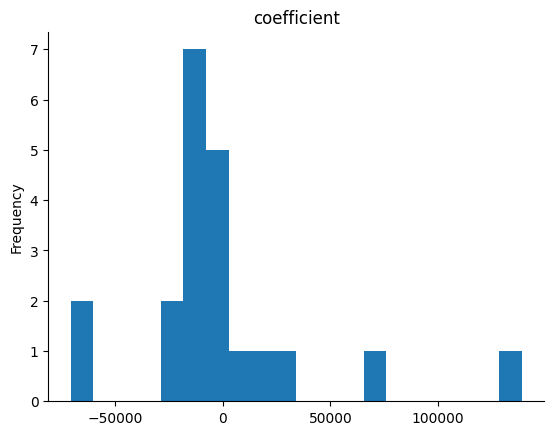

In [678]:
# @title coefficient

from matplotlib import pyplot as plt
coef_df['coefficient'].plot(kind='hist', bins=20, title='coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [679]:
#prediction data frame then add columns to original df
predictions_df = X_test.copy()
predictions_df['predictions'] = pipe_4.predict(X_test[['age', 'cylinders','luxury', 'condition', 'size','fuel', 'transmission','odometer_category','color_type', 'gregion']])
predictions_df['actual'] = y_test
predictions_df['residuals'] = predictions_df['actual'] - predictions_df['predictions']




In [680]:
predictions_df.head()

,condition,cylinders,fuel,transmission,size,luxury,odometer_category,color_type,age,gregion,predictions,actual,residuals
385109,good,6,diesel,automatic,subcompact,other,high,basic,11,other,94449.147460,43995,-50454.147460
61602,excellent,10,gas,automatic,full-size,other,high,basic,10,northwest,-16663.821051,0,16663.821051
224119,good,4,gas,automatic,subcompact,other,low,basic,7,other,36436.048557,40998,4561.951443
163202,good,6,gas,automatic,subcompact,other,medium,basic,8,other,21880.500641,0,-21880.500641
49366,good,6,gas,other,subcompact,other,low,basic,6,northwest,32836.896143,35990,3153.103857


In [681]:
df.head()


,price,condition,cylinders,fuel,transmission,size,luxury,odometer_category,color_type,age,gregion
27,33590,good,8,gas,other,subcompact,other,medium,basic,11,southeast
28,22590,good,8,gas,other,subcompact,other,medium,basic,15,southeast
29,39590,good,8,gas,other,subcompact,other,low,basic,5,southeast
30,30990,good,8,gas,other,subcompact,other,low,basic,8,southeast
31,15000,excellent,6,gas,automatic,full-size,other,high,basic,12,southeast


In [682]:
# merge the predictions back into the original df:
df = pd.merge(df, predictions_df[['predictions']], left_index=True, right_index=True, how='left')
df.tail()


,price,condition,cylinders,fuel,transmission,size,luxury,odometer_category,color_type,age,gregion,predictions
426875,23590,good,6,gas,other,mid-size,other,low,basic,6,other,NaN
426876,30590,good,4,gas,other,mid-size,other,low,basic,5,other,NaN
426877,34990,good,4,diesel,other,mid-size,luxury,low,basic,5,other,NaN
426878,28990,good,6,gas,other,mid-size,luxury,low,basic,7,other,23961.066701
426879,30590,good,4,gas,other,compact,luxury,low,basic,6,other,41653.642872


In [683]:
#gridsearch hyperparameters on model 2
# Create a ColumnTransformer to one-hot encode categorical features
ct = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['luxury', 'condition']),
       ('scaler', StandardScaler(), ['age'])
    ],
    remainder='passthrough'  # Keep numerical features as is
)

# Apply the ColumnTransformer to your data
X_train_encoded = ct.fit_transform(X_train[['age', 'luxury', 'condition']])
X_test_encoded = ct.transform(X_test[['age', 'luxury', 'condition']])  # Use transform, not fit_transform on test data

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)

# Fit the GridSearchCV with the encoded data
grid_search.fit(X_train_encoded, y_train)
print(grid_search.best_params_)

{'alpha': 100}


With such a high alpha, this tells me that there may be overfitting, specifically realated to the age feature.  This is likely a result of antique cars that cost more as they age, versus other cars.  For this reason, antique cars were pulled into their own group of luxury car--so as not to rely on the age, or year of the car.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

<Axes: xlabel='gregion', ylabel='price'>

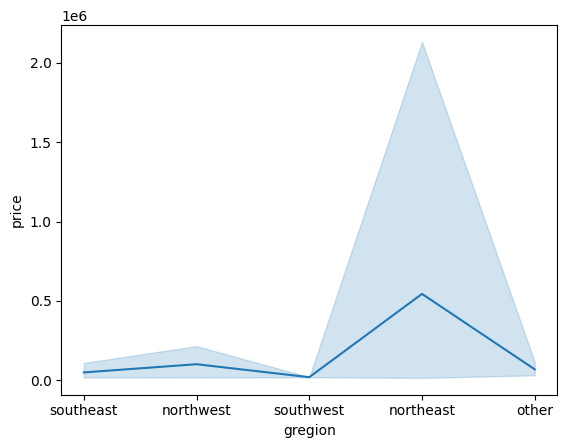

In [684]:
#sns lineplots of features with price
sns.lineplot(data=df, x='gregion', y='price')

<Axes: xlabel='fuel', ylabel='price'>

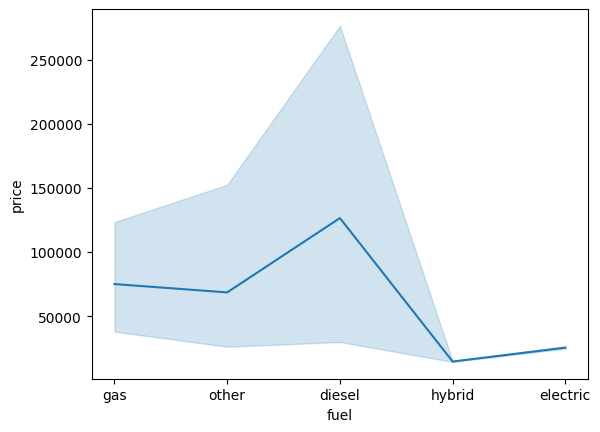

In [685]:
#sns lineplots of features with price
sns.lineplot(data=df, x='fuel', y='price')

<Axes: xlabel='transmission', ylabel='price'>

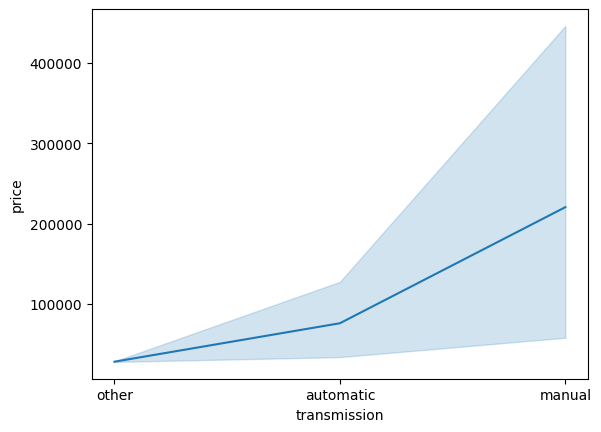

In [686]:
#sns lineplots of features with price
sns.lineplot(data=df, x='transmission', y='price')